# Exercise 3 : Exploratory Analysis

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
"""
Don't do this unless you know what you're doing.
I'm only including this to remove the warning statements that may overflow the notebook
"""
import warnings
warnings.filterwarnings('ignore')

---

## Setup : Import the Dataset

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [3]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## Problem 1 : Numeric Variables

Extract the required variables from the dataset, as mentioned in the problem.     
`LotArea`, `GrLivArea`, `TotalBsmtSF`, `GarageArea`, `SalePrice`    

In [4]:
# We want to focus on specific columns. 
# In Pandas, we use double square brackets `[[ ]]` to select multiple columns at once.
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


### Check the Variables Independently

Summary Statistics of `houseNumData`, followed by Statistical Visualizations on the variables. 

In [5]:
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


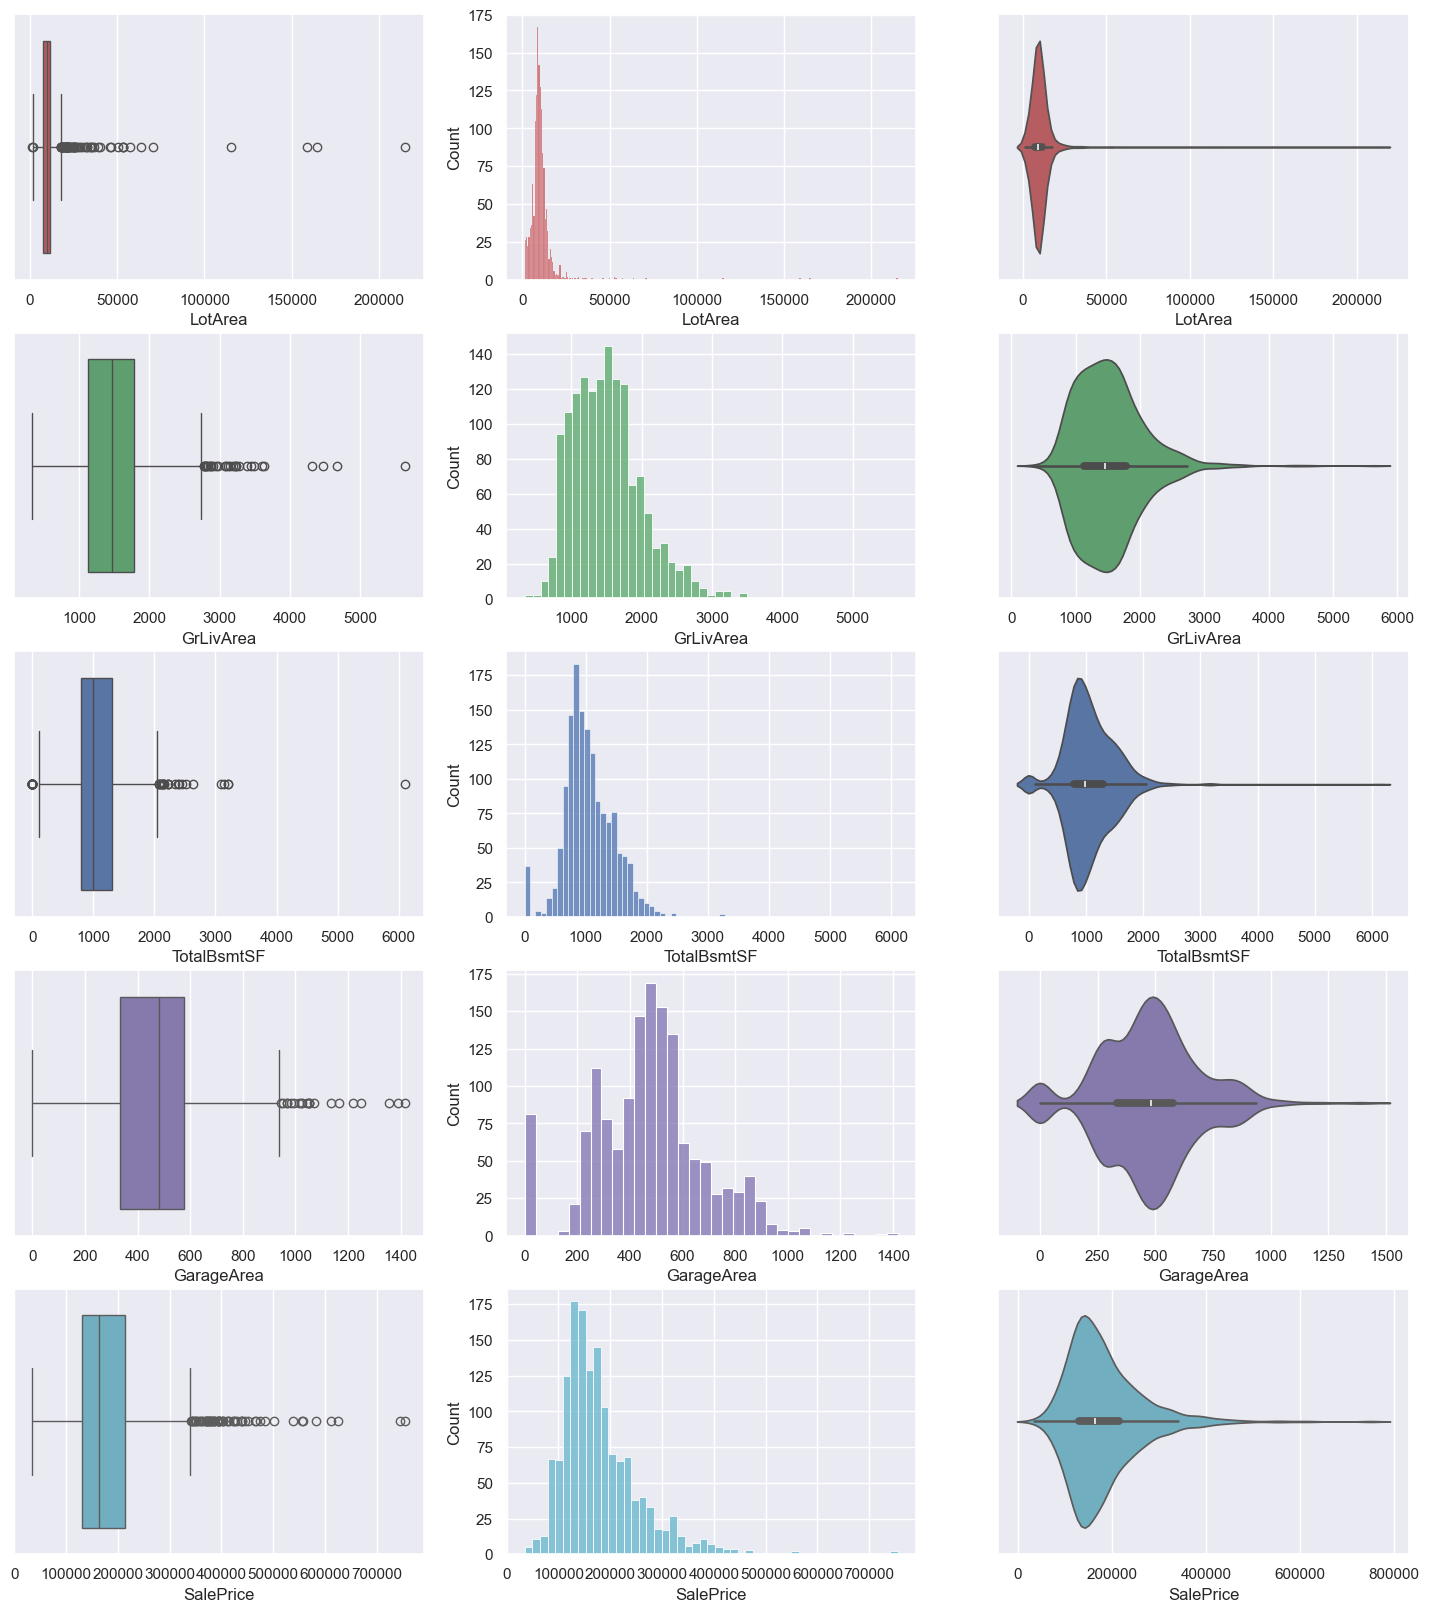

In [6]:
# We will draw 3 charts for each variable to understand its "shape".
# 1.  Boxplot: Good for spotting Outliers (the dots outside the box).
# 2.  Histogram: Good for seeing the Spread (is it a bell curve?).
# 3.  Violinplot: A mix of both (shows density).

# Create a grid of graphs (5 rows, 3 columns, with figure size of 18-length, 20-width)
f, axes = plt.subplots(5, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m", "c"]  # Colors for decoration

# FOR-LOOP
count = 0
for var in houseNumData:
    # Plot 1: Boxplot (Left column)
    sb.boxplot(data=houseNumData[var], orient = "h", color = colors[count], ax = axes[count,0])
    
    # Plot 2: Histogram (Middle column)
    sb.histplot(data=houseNumData[var], color = colors[count], ax = axes[count,1])
    
    # Plot 3: Violinplot (Right column)
    sb.violinplot(data=houseNumData[var], orient = "h", color = colors[count], ax = axes[count,2])

    count += 1  # Move onto next row

### Check the Relationship amongst Variables

Correlation between the variables, followed by all bi-variate jointplots.

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<Axes: >

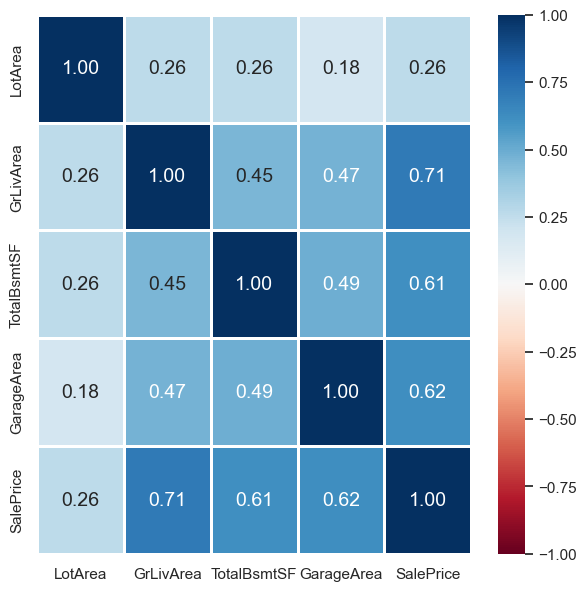

In [7]:
# We want to know which variables are related to SalesPrice
# The `corr()` function calculates a score between -1 and 1
# Closer to 1.0 --> Strong positive relationship (e.g., Big House = High Price)
# Closer to 0.0 --> No relationship

# Correlation Matrix (The Raw Numbers)
print(houseNumData.corr())

# Heatmap of the Correlation Matrix (The color-coded view)
f, axes = plt.subplots(1, 1, figsize=(7, 7))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

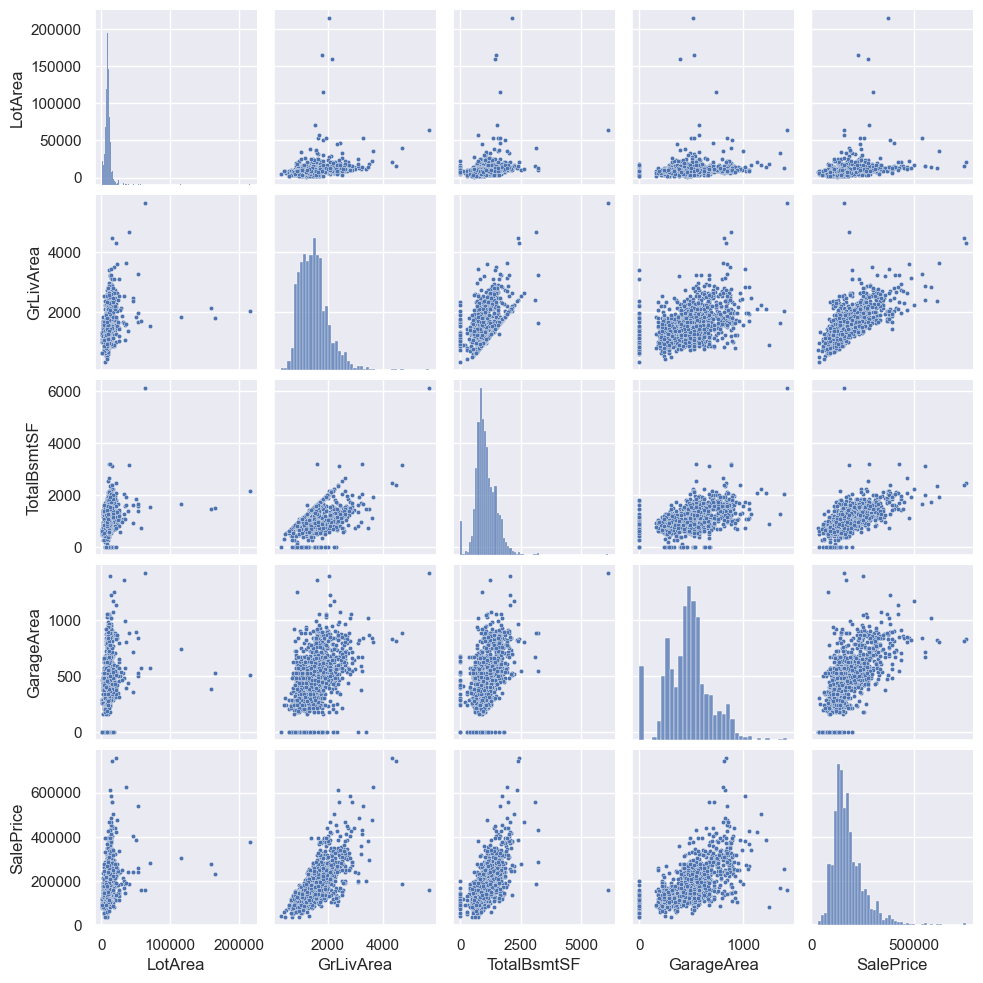

In [ ]:
# This draws a scatterplot for EVERY pair of variables.
# Look for the "SalePrice" row. We want to see diagonal lines (trends).
# If the dots look like a cloud, there is no pattern.
# If the dots look like a line, there is a strong pattern.

# Draw pairs of variables against one another
sb.pairplot(data = houseNumData, height=2, plot_kws={'s': 10})

**Which variables do you think will help us predict `SalePrice` in this dataset?**     

> `GrLivArea` : Possibly the most important variable : Highest Correlation, Strong Linearity    
> `GarageArea` and `TotalBsmtSF` : Important variables : High Correlation, Strong Linearity    
> `LotArea` : Doesn't seem so important as a variable : Low Correlation, Weak Linear Relation

Bonus : Attempt a comprehensive analysis with all *Numeric* variables in the dataset.

---

## Problem 2 : Categorical Variables

Extract the required variables from the dataset, as mentioned in the problem.     
`MSSubClass`, `Neighborhood`, `BldgType`, `OverallQual`

We have to be careful with types.

MSSubClass looks like a number (20, 30, 40), but it's actually a code (20 = 1-Story, 60 = 2-Story). 

We must tell Python to treat it as a `Category/Label`

In [9]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


In [10]:
# Demonstration: Why convert? 
# If we treat MSSubClass as numbers, we get meaningless math.
print("--- NUMERIC INTERPRETATION (WRONG) ---")
print(houseCatData['MSSubClass'].describe())

--- NUMERIC INTERPRETATION (WRONG) ---
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


Fix the data types of the first four variables to convert them to categorical.

**CRITICAL STEP: Converting Data Types**

**Why do we need this step?**

Some variables, like `MSSubClass` and `OverallQual`, look like numbers (Integers). 
However, they don't behave like numbers.

* **MSSubClass:** '20' is a code for a 1-story house. '60' is a code for a 2-story house. **(for example)** 
    * *Numeric Logic:* 60 is three times bigger than 20. (FALSE)
    * *Categorical Logic:* 60 is just a different group than 20. (TRUE)

We convert them to `category` so that:
1.  **.describe()** gives us counts and frequencies (useful) instead of averages (useless).
2.  **Plots** treat them as distinct groups rather than a continuous number line.

In [11]:
# Python sees 'MSSubClass' as an integer (number). We need to force it to be a 'category'.
# This tells the plotting libraries: "Don't do math on this. Treat 20 and 30 as different groups, like Cats and Dogs."

houseCatData['MSSubClass'] = houseCatData['MSSubClass'].astype('category')
houseCatData['Neighborhood'] = houseCatData['Neighborhood'].astype('category')
houseCatData['BldgType'] = houseCatData['BldgType'].astype('category')
houseCatData['OverallQual'] = houseCatData['OverallQual'].astype('category')

In [12]:
# If we convert to 'category', we get frequency counts.
print("--- CATEGORICAL INTERPRETATION (RIGHT) ---")
print(houseCatData['MSSubClass'].astype('category').describe())

--- CATEGORICAL INTERPRETATION (RIGHT) ---
count     1460
unique      15
top         20
freq       536
Name: MSSubClass, dtype: int64


In [13]:
# Check the change: Look for 'category' in the Dtype column
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   Neighborhood  1460 non-null   category
 2   BldgType      1460 non-null   category
 3   OverallQual   1460 non-null   category
dtypes: category(4)
memory usage: 7.8 KB


### Check the Variables Independently

Summary Statistics of `houseCatData`, followed by Statistical Visualizations on the variables. 

In [14]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


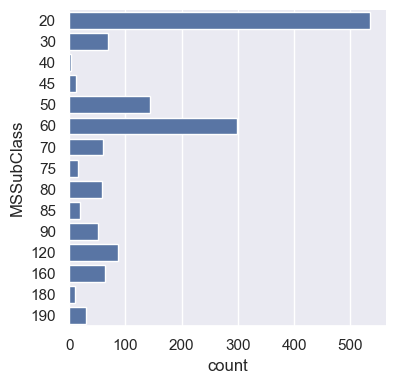

In [15]:
# We cannot use Histograms here. Instead, we use `catplot` (Count Plot).
# This is simply a bar chart showing "How many houses are in this category?"
sb.catplot(y = 'MSSubClass', data = houseCatData, kind = "count", height = 4)

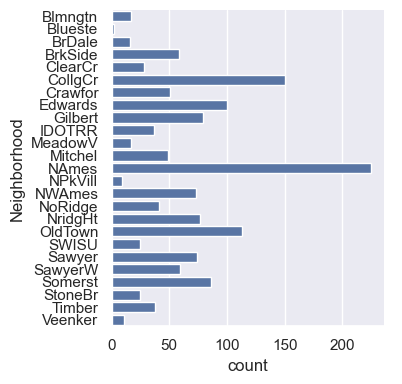

In [16]:
sb.catplot(y = 'Neighborhood', data = houseCatData, kind = "count", height = 4)

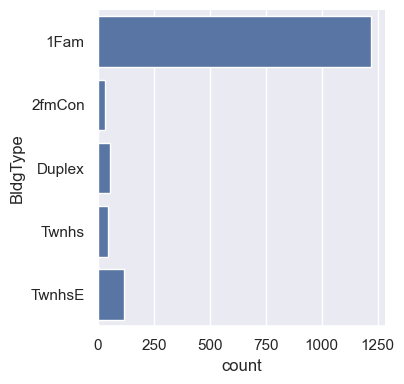

In [17]:
sb.catplot(y = 'BldgType', data = houseCatData, kind = "count", height = 4)

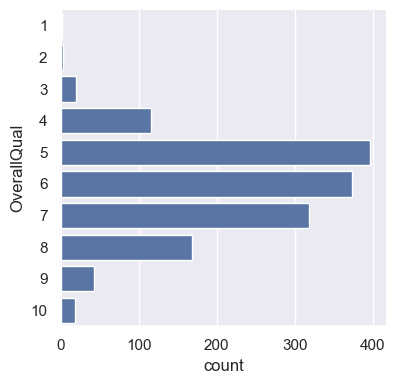

In [18]:
sb.catplot(y = 'OverallQual', data = houseCatData, kind = "count", height = 4)

### Check the Relationship amongst Variables

Joint heatmaps of some of the important bi-variate relationships in `houseCatData`. 

<Axes: xlabel='MSSubClass', ylabel='BldgType'>

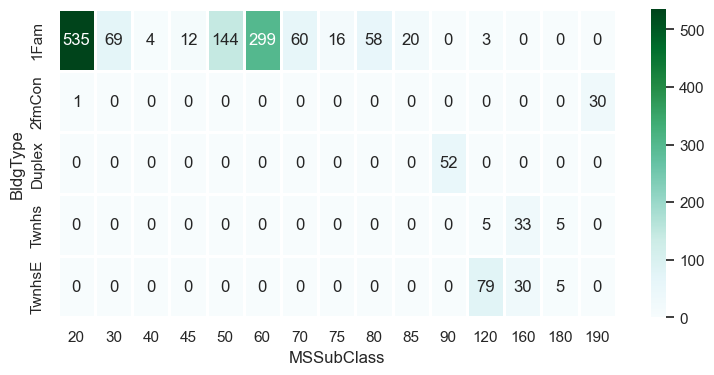

In [19]:
# We want to see how two categories overlap.

# The code below does three things:
# 1. `groupby`: Groups data by two columns (e.g., Building Type AND Class).
# 2. `size()`: Counts the number of houses in each group.
# 3. `unstack()`: Arranges the result into a matrix grid so we can heat-map it.


# Example: What types of buildings (BldgType) fall into which Classes (MSSubClass)?
f, axes = plt.subplots(1, 1, figsize=(9, 4))
sb.heatmap(houseCatData.groupby(['BldgType', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', cmap = "BuGn")

<Axes: xlabel='MSSubClass', ylabel='OverallQual'>

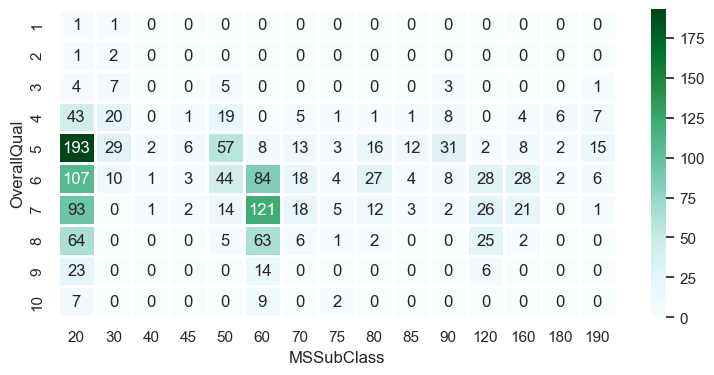

In [20]:
# Distribution of OverallQual across MSSubClass
f, axes = plt.subplots(1, 1, figsize=(9, 4))
sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g',  cmap = "BuGn")

<Axes: xlabel='Neighborhood', ylabel='OverallQual'>

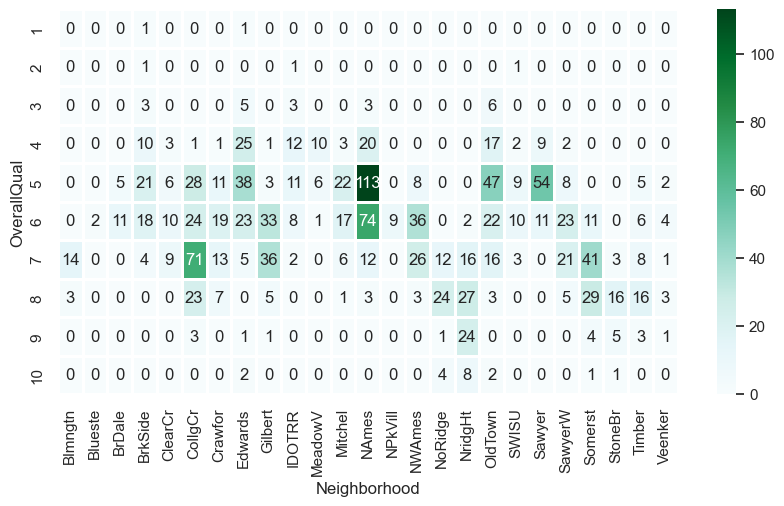

In [21]:
# Distribution of OverallQual across Neighborhood
f, axes = plt.subplots(1, 1, figsize=(10, 5))
sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', cmap = "BuGn")

<Axes: xlabel='BldgType', ylabel='OverallQual'>

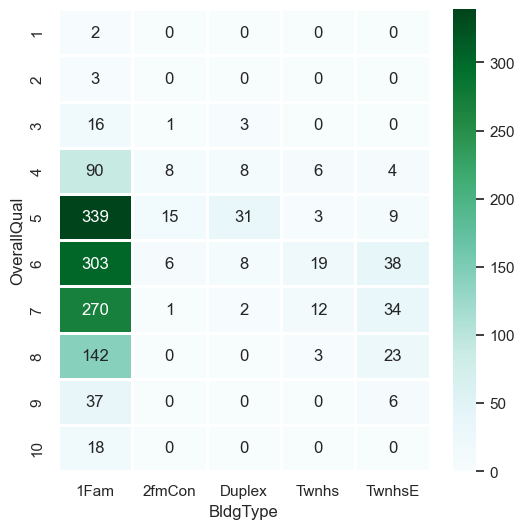

In [22]:
# Distribution of OverallQual across BldgType
f, axes = plt.subplots(1, 1, figsize=(6, 6))
sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', cmap = "BuGn")

### Check the effect of the Variables on SalePrice

Create a joint DataFrame by concatenating `SalePrice` to `houseCatData`.   

In [23]:
# We join the `SalePrice` back to our categorical data to see patterns.
saleprice = pd.DataFrame(houseData['SalePrice'])
houseCatSale = pd.concat([houseCatData, saleprice], axis = 1)
houseCatSale.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


Check the distribution of `SalePrice` across different `MSSubClass`.

We use Boxplots here:
* X-Axis = The Category (e.g., Neighborhood)
* Y-Axis = The Price

What to look for:
* If the boxes are at different heights, it means the Category MATTERS.
* If all boxes are at the same height, the Category DOES NOT matter for the price.

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

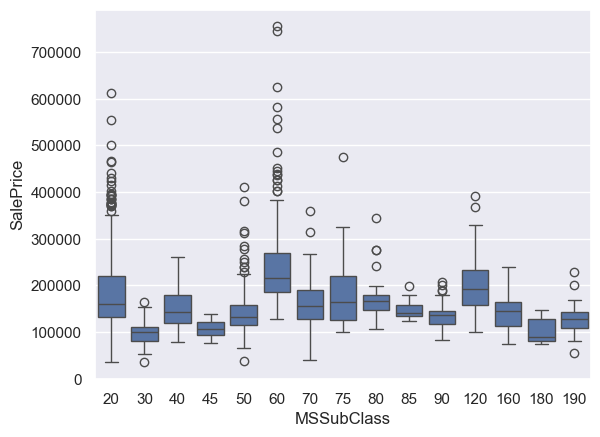

In [27]:

sb.boxplot(x = 'MSSubClass', y = 'SalePrice', data = houseCatSale)

Check the distribution of `SalePrice` across different `Neighborhood`.

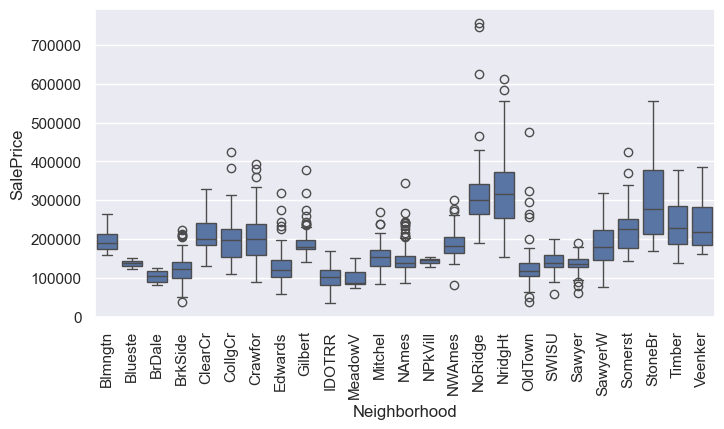

In [25]:
f, axes = plt.subplots(1, 1, figsize=(8, 4))
sb.boxplot(x = 'Neighborhood', y = 'SalePrice', data = houseCatSale)
plt.xticks(rotation=90);

Check the distribution of `SalePrice` across different `BldgType`.

<Axes: xlabel='BldgType', ylabel='SalePrice'>

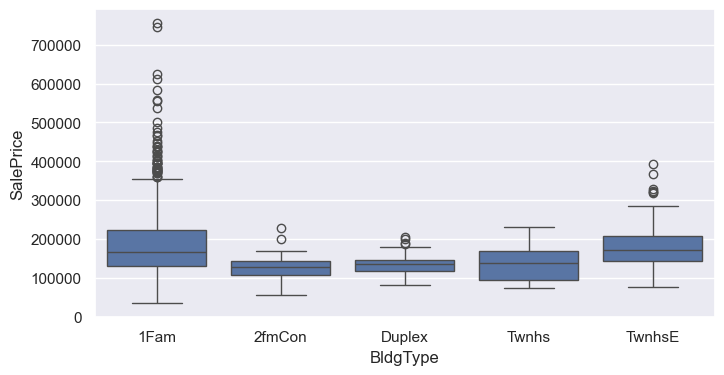

In [26]:
f, axes = plt.subplots(1, 1, figsize=(8, 4))
sb.boxplot(x = 'BldgType', y = 'SalePrice', data = houseCatSale)

Check the distribution of `SalePrice` across different `OverallQual`.

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

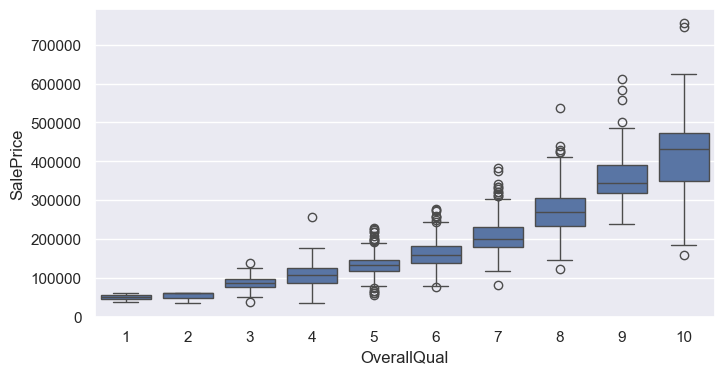

In [27]:
f, axes = plt.subplots(1, 1, figsize=(8, 4))
sb.boxplot(x = 'OverallQual', y = 'SalePrice', data = houseCatSale)

**Which variables do you think will help us predict `SalePrice` in this dataset?**     

> `OverallQual` : Definitely the most important variable : Highest variation in `SalePrice` across the levels   
> `Neighborhood` and `MSSubClass` : Moderately important variables : Medium variation in `SalePrice` across levels   
> `BldgType` : Not clear if important as a variable at all : Not much variation in `SalePrice` across the levels   

Bonus : Attempt a comprehensive analysis with all *Categorical* variables in the dataset.

`Repeating from above`

We use Boxplots here:
* X-Axis = The Category (e.g., Neighborhood)
* Y-Axis = The Price

What to look for:
* If the boxes are at different heights, it means the Category MATTERS.
* If all boxes are at the same height, the Category DOES NOT matter for the price.